# Data Split 

Our data originally had Train, Test, Val. The validation folder from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data) only had 16 images in the val folder which makes it difficult to know if the model is overfitting or not. Instead we can manually combine the val into train in there respective subdirectory and then use python to recreate the val folder to sample 20% of each category to a validation folder.

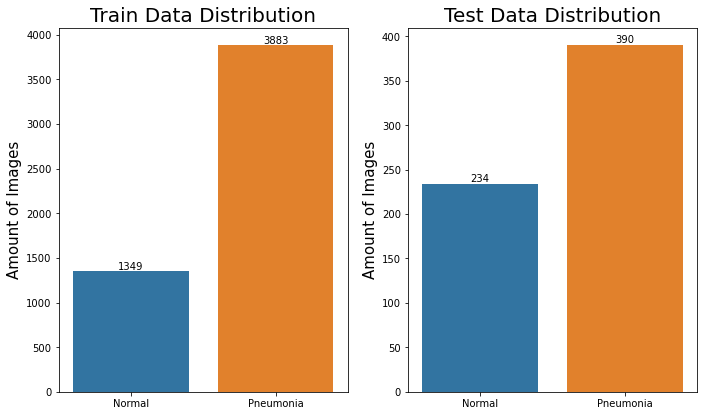

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Identify Test and Train folders

train_folder = "data/chest_xray/train/"
test_folder = "data/chest_xray/test/"

# Count the number of files in each subdirectory
train_normal = len(os.listdir(os.path.join(train_folder, "NORMAL")))
train_pneu = len(os.listdir(os.path.join(train_folder, "PNEUMONIA")))
test_normal = len(os.listdir(os.path.join(test_folder, "NORMAL")))
test_pneu = len(os.listdir(os.path.join(test_folder, "PNEUMONIA")))

# Create a bar plot
# Specify label sizes
size_title = 20 
size_labels = 15
size_ticks = 10

# Create a bar plots
# Function to get the number of files in a folder
def count_files_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Specify the paths 
categories = ['NORMAL', 'PNEUMONIA']

# Get the number of images for each category in Train folder
values1 = [count_files_in_folder(os.path.join(train_folder, category)) for category in categories]

# Get the number of images for each category in Test folder
values2 = [count_files_in_folder(os.path.join(test_folder, category)) for category in categories]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10,6))

# Make subplot 1
ax0 = sns.barplot(x=["Normal", "Pneumonia"], y=[train_normal, train_pneu], ax=ax[0])
# Add text annotations for the values on top of the bars for train plot
for i, value in enumerate(values1):
    ax0.text(i, value + 0.1, str(value), color='black', ha='center', va='bottom', fontsize=size_ticks)

ax0.set_title('Train Data Distribution', fontsize=size_title)
ax0.set_ylabel('Amount of Images', fontsize=size_labels)

# Make subplot 2
ax1 = sns.barplot(x=["Normal", "Pneumonia"], y=[test_normal, test_pneu], ax=ax[1])
# Add text annotations for the values on top of the bars for test plot
for i, value in enumerate(values2):
    ax1.text(i, value + 0.1, str(value), color='black', ha='center', va='bottom', fontsize=size_ticks)

ax1.set_title('Test Data Distribution', fontsize=size_title)
ax1.set_ylabel('Amount of Images', fontsize=size_labels)

plt.tight_layout(pad=1.5)
plt.show()


We need to make a validation folder by sampling some images from our training folder. Lets make a function that can handle it

In [2]:
import os
import shutil
import random

def create_validation_folder(base_path, validation_folder_name, split_ratio=0.2):
    # Create the validation folder
    validation_path = os.path.join(base_path, validation_folder_name)
    os.makedirs(validation_path, exist_ok=True)

    # List all subfolders in the train folder
    train_path = os.path.join(base_path, 'train')
    subfolders = [f.name for f in os.scandir(train_path) if f.is_dir()]

    # Create subdirectories in the validation folder
    for subfolder in subfolders:
        os.makedirs(os.path.join(validation_path, subfolder), exist_ok=True)
        
    # Move a portion of files from each subfolder to the validation folder
    for subfolder in subfolders:
        subfolder_path = os.path.join(train_path, subfolder)
        all_files = os.listdir(subfolder_path)

        # Randomly select a portion of files for validation
        num_validation_files = int(len(all_files) * split_ratio)
        validation_files = random.sample(all_files, num_validation_files)

        # Move the selected validation files to the validation folder
        for file_name in validation_files:
            src_path = os.path.join(subfolder_path, file_name)
            dest_path = os.path.join(validation_path, subfolder, file_name)
            shutil.move(src_path, dest_path)

In [3]:
base_path = "data/chest_xray/"
validation_folder_name = 'validation'

create_validation_folder(base_path=base_path, validation_folder_name=validation_folder_name)

Now lets make an updated distribution 

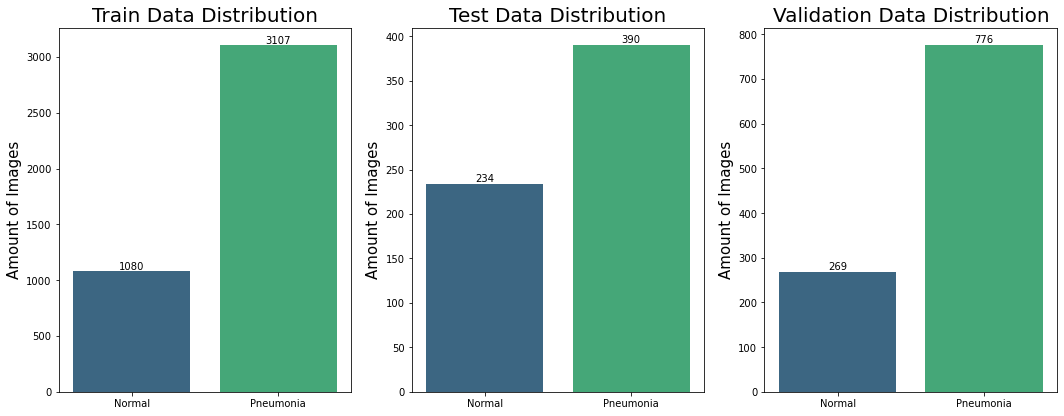

In [5]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Identify Test, Train, Val folders

train_folder = "data/chest_xray/train/"
test_folder = "data/chest_xray/test/"
val_folder = "data/chest_xray/validation/"

# Count the number of files in each subdirectory
train_normal = len(os.listdir(os.path.join(train_folder, "NORMAL")))
train_pneu = len(os.listdir(os.path.join(train_folder, "PNEUMONIA")))
test_normal = len(os.listdir(os.path.join(test_folder, "NORMAL")))
test_pneu = len(os.listdir(os.path.join(test_folder, "PNEUMONIA")))
val_normal = len(os.listdir(os.path.join(val_folder, "NORMAL")))
val_pneu = len(os.listdir(os.path.join(val_folder, "PNEUMONIA")))

# Create a bar plot
# Specify label sizes
size_title = 20 
size_labels = 15
size_ticks = 10

# Create a bar plots
# Function to get the number of files in a folder
def count_files_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Specify the paths 
categories = ['NORMAL', 'PNEUMONIA']

# Get the number of images for each category in Train folder
values1 = [count_files_in_folder(os.path.join(train_folder, category)) for category in categories]

# Get the number of images for each category in Test folder
values2 = [count_files_in_folder(os.path.join(test_folder, category)) for category in categories]

# Get the number of images for each category in Validation folder
values3 = [count_files_in_folder(os.path.join(val_folder, category)) for category in categories]

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(15,6))

# Make subplot 1
ax0 = sns.barplot(x=["Normal", "Pneumonia"], y=[train_normal, train_pneu], palette="viridis", ax=ax[0])
# Add text annotations for the values on top of the bars for train plot
for i, value in enumerate(values1):
    ax0.text(i, value + 0.1, str(value), color='black', ha='center', va='bottom', fontsize=size_ticks)

ax0.set_title('Train Data Distribution', fontsize=size_title)
ax0.set_ylabel('Amount of Images', fontsize=size_labels)

# Make subplot 2
ax1 = sns.barplot(x=["Normal", "Pneumonia"], y=[test_normal, test_pneu], palette="viridis", ax=ax[1])
# Add text annotations for the values on top of the bars for test plot
for i, value in enumerate(values2):
    ax1.text(i, value + 0.1, str(value), color='black', ha='center', va='bottom', fontsize=size_ticks)

ax1.set_title('Test Data Distribution', fontsize=size_title)
ax1.set_ylabel('Amount of Images', fontsize=size_labels)

# Make subplot 3
ax2 = sns.barplot(x=["Normal", "Pneumonia"], y=[val_normal, val_pneu], palette="viridis", ax=ax[2])
# Add text annotations for the values on top of the bars for test plot
for i, value in enumerate(values3):
    ax2.text(i, value + 0.1, str(value), color='black', ha='center', va='bottom', fontsize=size_ticks)

ax2.set_title('Validation Data Distribution', fontsize=size_title)
ax2.set_ylabel('Amount of Images', fontsize=size_labels)

plt.tight_layout(pad=1.5)
plt.show()

A sanity check

In [6]:
import os

train_directory = 'data/CellData/chest_xray/train/'
val_directory = 'data/CellData/chest_xray/validation/'

# Get the list of file names in each subdirectory
subdirectory = ["NORMAL", "PNEUMONIA"]

for sub in subdirectory:
    train_files = set(os.listdir(train_directory + sub))
    val_files = set(os.listdir(val_directory + sub))

# Check for overlapping files
overlapping_files = train_files.intersection(val_files)

if overlapping_files:
    print(f"Warning: Data leakage detected. Overlapping files: {overlapping_files}")
else:
    print("No data leakage detected.")

No data leakage detected.
